In [23]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/mussie/Music/home projects/statistics for ds/report.csv')
df.head(4)

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58


In [5]:
mean= df['population'].mean()
print('mean of the poplulation',mean)



trimmed_mean = stats.trim_mean(df['population'],0.2)
print('trimeed mean of the population',trimmed_mean)

median= df['population'].median()
print('median of population',median)

mean of the poplulation 795698.0891304348
trimeed mean of the population 578054.3866980576
median of population 536614.5


In [9]:
rapes_percapita = np.nan_to_num(df['rapes_percapita'], nan=0)
rapes = np.nan_to_num(df['rapes'], nan=0)

weighted_average = np.average(rapes_percapita,weights=rapes)
print('weighted mean of the homicide in the country is ',weighted_average)

weighted mean of the homicide in the country is  70.16533117533356


# Variability Estimates of State Population

In [15]:
std =df['population'].std()
print('std',std)

IQR = df['population'].quantile(0.75)- df['population'].quantile(0.25)
print('inter quartile range',IQR)


mad =sm.robust.mad(df['population'])
print('median absoulte deviation',mad)


std 1010316.3036166393
inter quartile range 434836.5
median absoulte deviation 266662.3176226361


In [17]:
df['rapes_percapita'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     14.0655
0.25     35.8350
0.50     55.9650
0.75     77.8075
0.95    118.8295
Name: rapes_percapita, dtype: float64

# Box Plot

<Axes: >

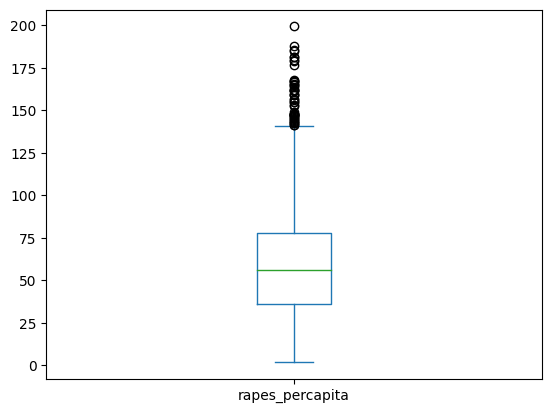

In [18]:
df['rapes_percapita'].plot.box()

# Frequency table

In [19]:
#using pd.cut
binned_frequency = pd.cut(df['population'],10)
binned_frequency.value_counts()

population
(92389.825, 938080.5]     2153
(938080.5, 1775398.0]      391
(2612715.5, 3450033.0]      55
(3450033.0, 4287350.5]      25
(6799303.0, 7636620.5]      25
(1775398.0, 2612715.5]      24
(7636620.5, 8473938.0]      15
(4287350.5, 5124668.0]       0
(5124668.0, 5961985.5]       0
(5961985.5, 6799303.0]       0
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

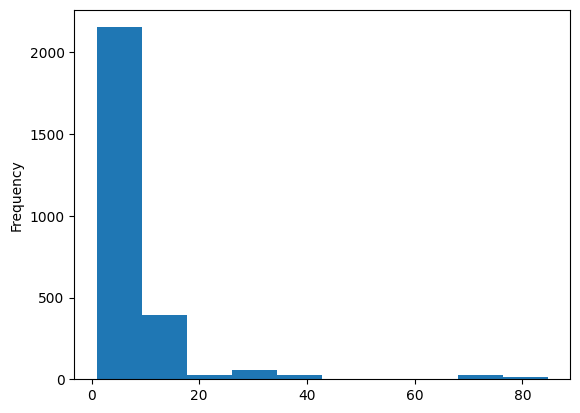

In [20]:
# histogram
(df['population']/100000).plot.hist()

# Exploring Binary and Categorical Data

# correlation

In [27]:
df1 = df[['report_year', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita']]

<Axes: >

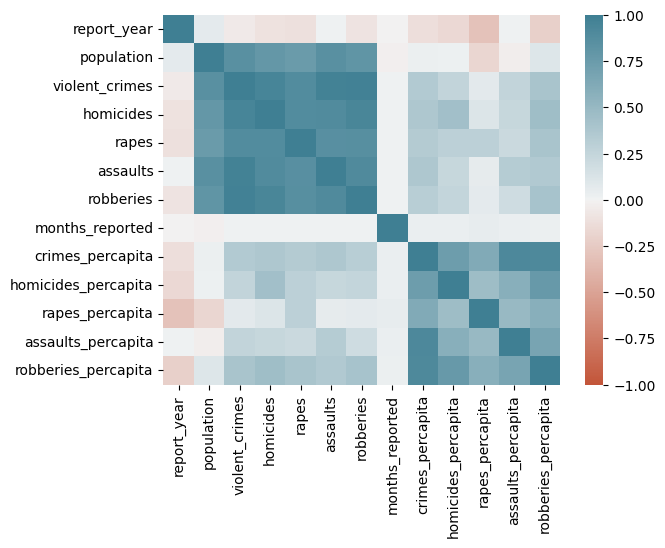

In [29]:
correlation_matrix = df1.corr()
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))


<Axes: xlabel='homicides', ylabel='rapes'>

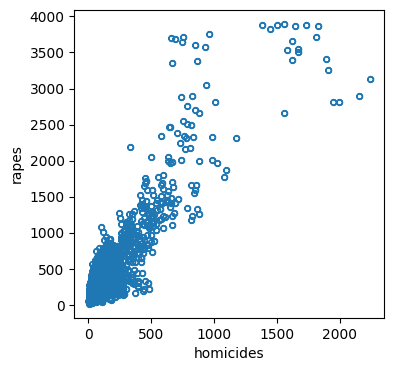

In [30]:
# Scatter plot
df.plot.scatter(x='homicides',y='rapes',figsize=(4, 4), marker='$\u25EF$')

# Exploring Two or More Variables

Text(0, 0.5, 'rapes')

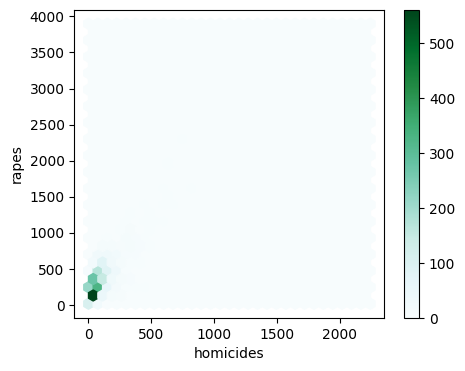

In [31]:
#Hexagonal Binning and Contours
#(Plotting Numeric Versus Numeric Data)
# usually we will use this for bivariant or multivariant analysis and if our data points are larger

ax = df.plot.hexbin(x='homicides', y='rapes',
 gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('homicides')
ax.set_ylabel('rapes')

# Two Categorical Variables

In [ ]:
# A useful way to summarize two categorical variables is a contingency table—a table of counts by category.
# best way to to do contingency table is using pivot table

#   Categorical and Numeric Data

In [ ]:
# we can use box plot
# violin plot

# by is for catagorical value  coulmn is numeric value
ax = df.boxplot(by='airline', column='pct_carrier_delay')


#Hexagonal binning and contour plots are useful tools that permit graphical 
#examination of two numeric variables at a time, without being overwhelmed by
#huge amounts of data.

#• Contingency tables are the standard tool for looking at the counts of two catego‐
#rical variables.

#• Boxplots and violin plots allow you to plot a numeric variable against a categori‐
#cal variable.



# Visualizing Multiple Variables

In [ ]:
# sns.FacetGrid is used to more than 3 variables

In [ ]:
# Create a FacetGrid with three variables
g = sns.FacetGrid(df, row='homicides', col='rapes', hue='assaults')

# Define the plot type or function you want to use
g.map(plt.scatter, 'x', 'y')

# Add a legend
g.add_legend()

# Show the plot
plt.show()

